In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
x=data.iloc[:,2:4].values

In [6]:
x.shape

(400, 2)

In [7]:
y=data.iloc[:,-1].values

In [8]:
y.shape

(400,)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [10]:
x_train.shape

(320, 2)

In [11]:
x_test.shape

(80, 2)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [13]:
x_train=scaler.fit_transform(x_train)
x_train

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.12486052e+00,  4.05475767e-01],
       [ 2.08307503e-01, -2.85921633e-01],
       [ 2.08307503e-01,  2.32626417e-01],
       [ 1.16057037e+00, -7.46853234e-01],
       [-1.12486052e+00, -7.75661459e-01],
       [-1.50576567e+00, -1.99496958e-01],
       [-1.88667081e+00,  3.47859317e-01],
       [ 8.74891513e-01, -6.60428559e-01],
       [-2.67823933e-01, -3.43538083e-01],
       [-9.34407943e-01,  4.91900442e-01],
       [ 7.79665226e-01, -3.14729858e-01],
       [ 2.01760696e+00, -1.17897661e+00],
       [-7.43955368e-01,  2.61434642e-01],
       [-5.53502794e-01,  1.35614719e+00],
       [-1.69621824e+00, -1.35182596e+00],
       [-2.67823933e-01, -9.19702584e-01],
       [ 1.92238067e+00, -9.19702584e-01],
       [ 3.03533790e-01, -5.16387434e-01],
       [ 1.13081216e-01,  1.50018832e+00],
       [ 1.13081216e-01,  2.61434642e-01],
       [-1.60099195e+00,  5.97770669e-02],
       [-2.67823933e-01, -2.57113408e-01],
       [ 1.92238067e+00, -6.60428559e-01],
       [-1.

In [14]:
x_test=scaler.fit_transform(x_test)
x_test

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.96246752e-01, -1.28303152e-01],
       [-1.35919047e+00,  4.15286527e-01],
       [-2.93158728e-01, -1.40733769e+00],
       [-8.74630586e-01, -3.20158333e-01],
       [ 7.72873011e-01,  1.98210384e+00],
       [-1.96246752e-01, -1.50326528e+00],
       [-3.90070705e-01, -5.75965241e-01],
       [ 4.82137082e-01, -4.80037651e-01],
       [-2.42279941e-03, -5.43989378e-01],
       [ 4.82137082e-01,  3.51334800e-01],
       [-1.96246752e-01, -1.40733769e+00],
       [ 4.82137082e-01,  1.27503756e-01],
       [-9.71542563e-01, -1.56721701e+00],
       [-1.45610244e+00, -1.34338597e+00],
       [-9.93347757e-02, -1.15153078e+00],
       [-1.96246752e-01, -3.20158333e-01],
       [ 1.91401153e-01,  2.55407210e-01],
       [ 9.44891769e-02, -1.28303152e-01],
       [ 3.85225106e-01,  9.55278922e-02],
       [ 2.88313130e-01,  6.35520287e-02],
       [-1.64992640e+00, -1.05560319e+00],
       [ 3.85225106e-01,  3.19358937e-01],
       [ 1.35434487e+00,  2.07803143e+00],
       [ 4.

In [15]:
# 1st method
np.sqrt(x_train.shape[0])

17.88854381999832

In [16]:
k=17

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

In [18]:
# Train our model     (sqrt of the rows)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

In [19]:
y_pred=knn.predict(x_test)

In [20]:
y_pred.shape

(80,)

In [22]:
y_test.shape

(80,)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.875

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[52,  6],
       [ 4, 18]], dtype=int64)

In [71]:
#Effect of k on Training Error rate and validation Error rate

error_train=[]
error_test=[]

for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    x=confusion_matrix(y_train,knn.predict(x_train))
    y=confusion_matrix(y_test,knn.predict(x_test))
    error_train.append((x[0][1]+x[1][0])/x.sum())
    error_test.append((y[0][1]+y[1][0])/y.sum())

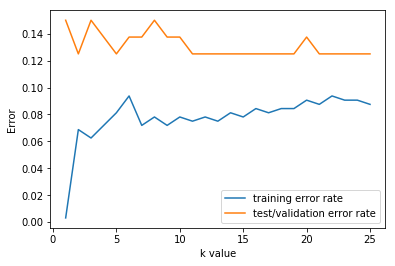

In [73]:
plt.plot(range(1,26),error_train,label='training error rate')
plt.plot(range(1,26),error_test,label='test/validation error rate')
plt.xlabel('k value')
plt.ylabel('Error')
plt.legend()

In [25]:
# 2nd method    (Trial and error method)

accuracy=[]

for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(x_test)))

In [26]:
len(accuracy)

25

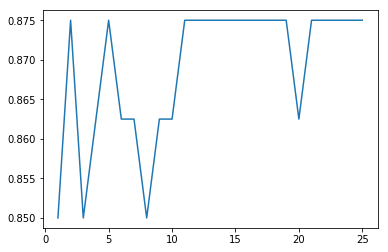

In [27]:
plt.plot(range(1,26),accuracy)

In [28]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [29]:
y_pred=knn.predict(x_test)

In [30]:
accuracy_score(y_test,y_pred)

0.875

In [31]:
def predict_output():
    age=int(input("Enter the age"))
    salary=int(input("Enter the salary"))
    
    x_new=np.array([[age],[salary]]).reshape(1,2)
    x_new=scaler.transform(x_new)
    
    if knn.predict(x_new)[0]==0:
        return"Will not purchase"
    else:
        return"Will purchase"

In [32]:
predict_output()

Enter the age26
Enter the salary45000


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


'Will not purchase'

# Creating a Meshgrid

In [37]:
a=np.arange(start=x_train[:,0].min()-1,stop=x_train[:,0].max()+1,step=0.01)
b=np.arange(start=x_train[:,1].min()-1,stop=x_train[:,1].max()+1,step=0.01)

xx,yy=np.meshgrid(a,b)


In [40]:
yy.shape

(589, 600)

# Classifying every point on the meshgrid

In [63]:
input_array=np.array([xx.ravel(),yy.ravel()]).T

labels=knn.predict(input_array)

In [64]:
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

# Plotting the array as an image

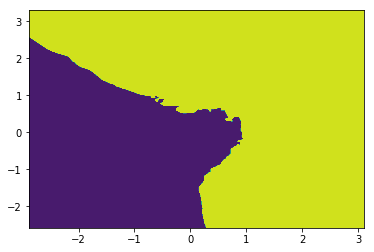

In [65]:
plt.contourf(xx,yy,labels.reshape(xx.shape))

# Plotting all the training data on the plot

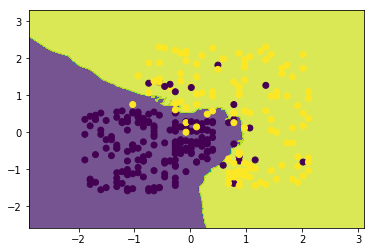

In [69]:
plt.contourf(xx,yy,labels.reshape(xx.shape),alpha=0.75)
plt.scatter(x_train[:,0],x_train[:,1], c=y_train)